<h1>Loading and Exploring dataset

In [5]:
import pandas as pd

df = pd.read_csv('Applicant-details.csv')

df.head()


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [7]:
df.shape

(100000, 13)

<h3>Checking Mising Values

In [3]:

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64


<h3> Checking duplicate values

In [4]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()


Number of duplicate rows: 0


In [5]:
df.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [17]:
df_orignal=df.copy()

In [12]:
df.dtypes

Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

<h1>Detecting Outliers visually using box plot for Numerical coulumns

<h3>Using Boxplots

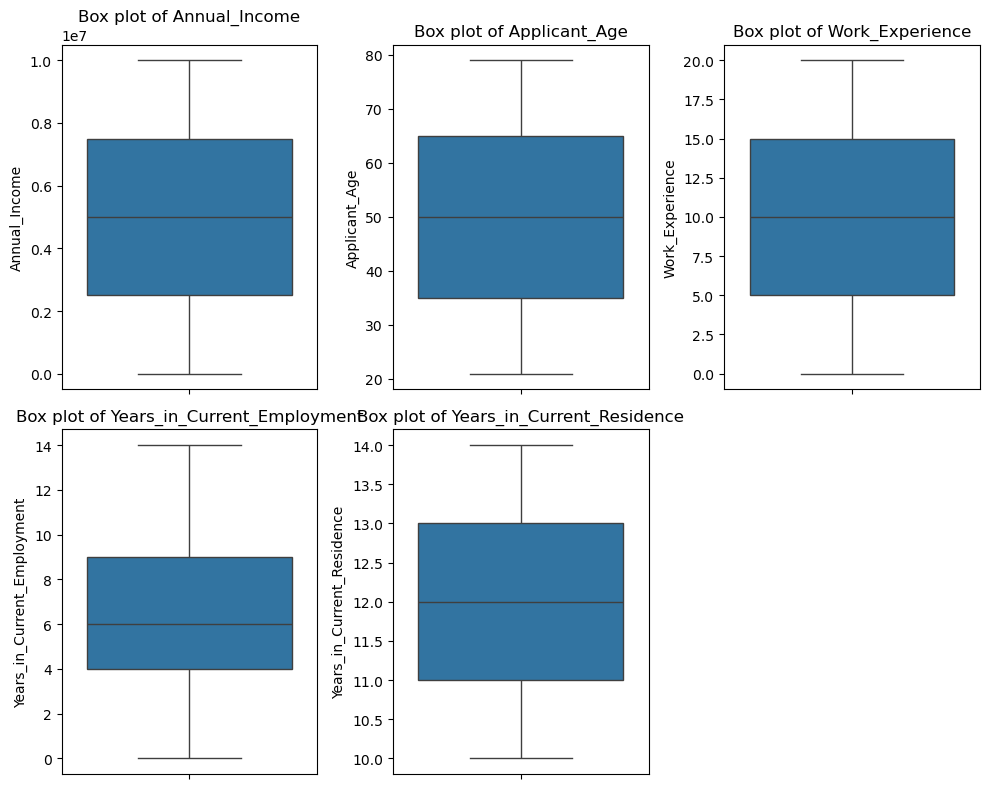

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


<h3> Using Histogram

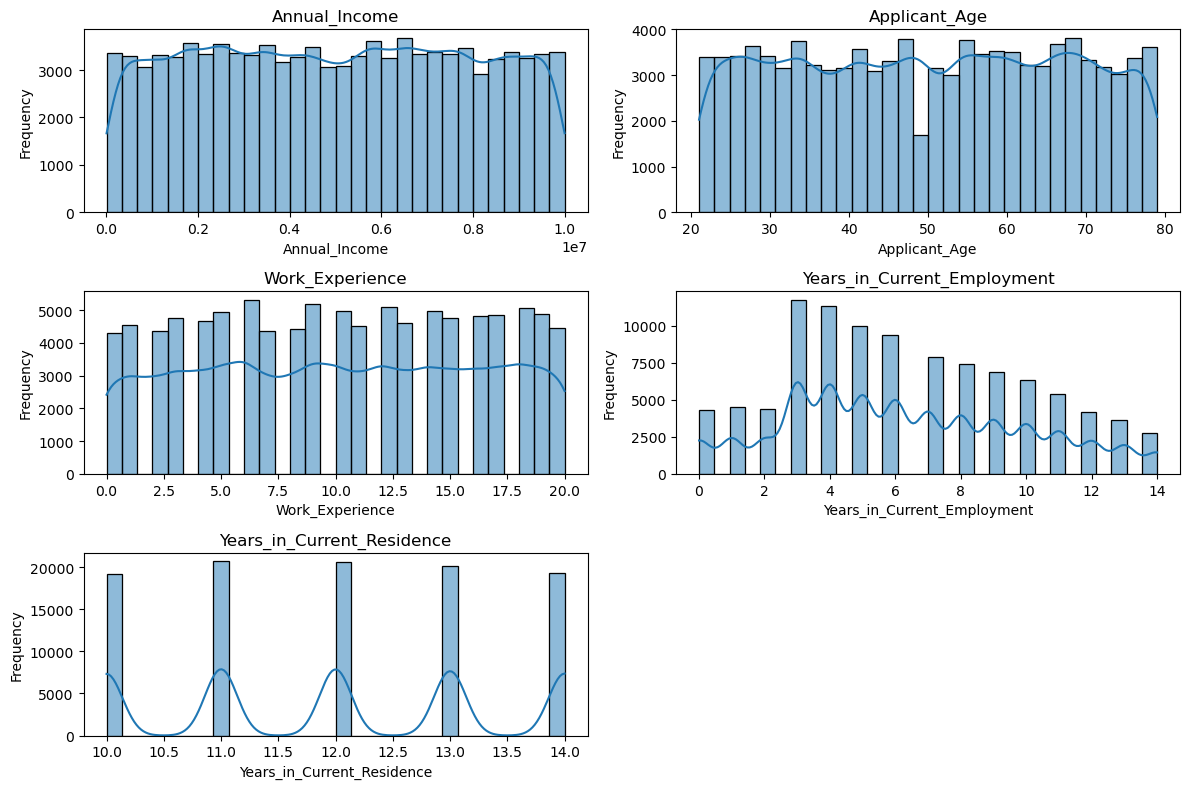

In [6]:
columns_to_check = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 
                    'Years_in_Current_Employment', 'Years_in_Current_Residence']

# Plotting histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers in '{col}':")
    print(outliers)
    print("\n")


Outliers in 'Applicant_ID':
Empty DataFrame
Columns: [Applicant_ID, Annual_Income, Applicant_Age, Work_Experience, Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation, Residence_City, Residence_State, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk]
Index: []


Outliers in 'Annual_Income':
Empty DataFrame
Columns: [Applicant_ID, Annual_Income, Applicant_Age, Work_Experience, Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation, Residence_City, Residence_State, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk]
Index: []


Outliers in 'Applicant_Age':
Empty DataFrame
Columns: [Applicant_ID, Annual_Income, Applicant_Age, Work_Experience, Marital_Status, House_Ownership, Vehicle_Ownership(car), Occupation, Residence_City, Residence_State, Years_in_Current_Employment, Years_in_Current_Residence, Loan_Default_Risk]
Index: []


Outliers in 'Work_Experience':
Empty DataFrame
Columns: [Applicant_ID, Annual_Incom

<h1>Using Standarization Process to balance Results

<h3> Standariztion of boxplot

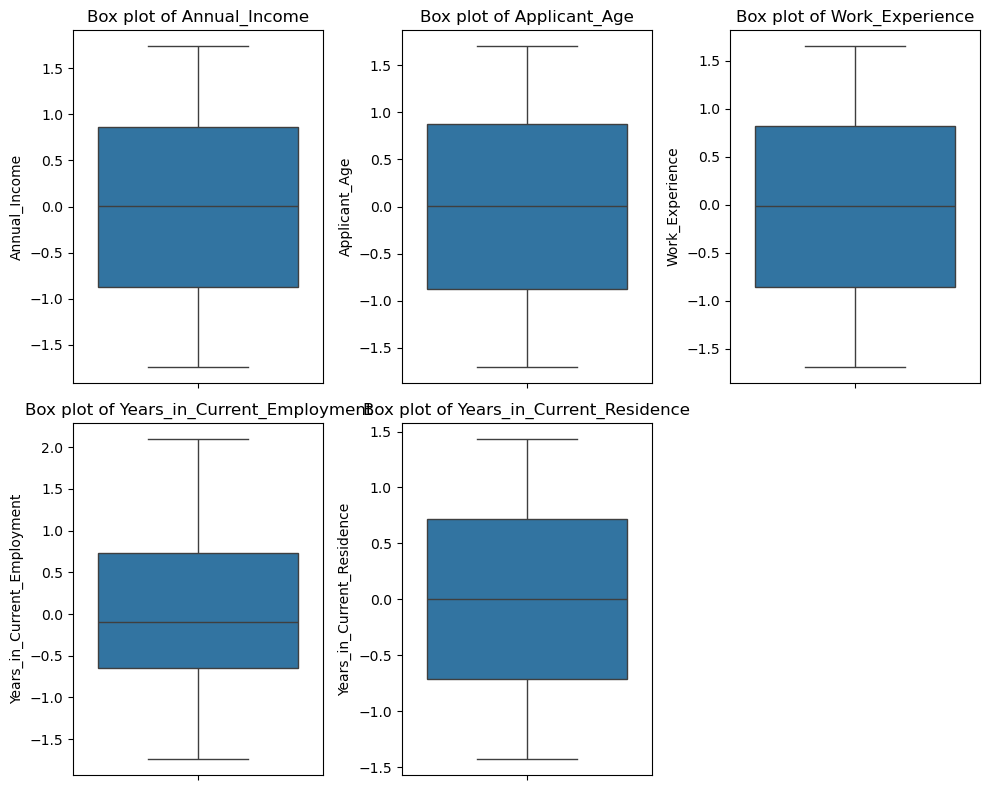

In [7]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence']

# Apply standardization
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

<h3> standardizing of histogram

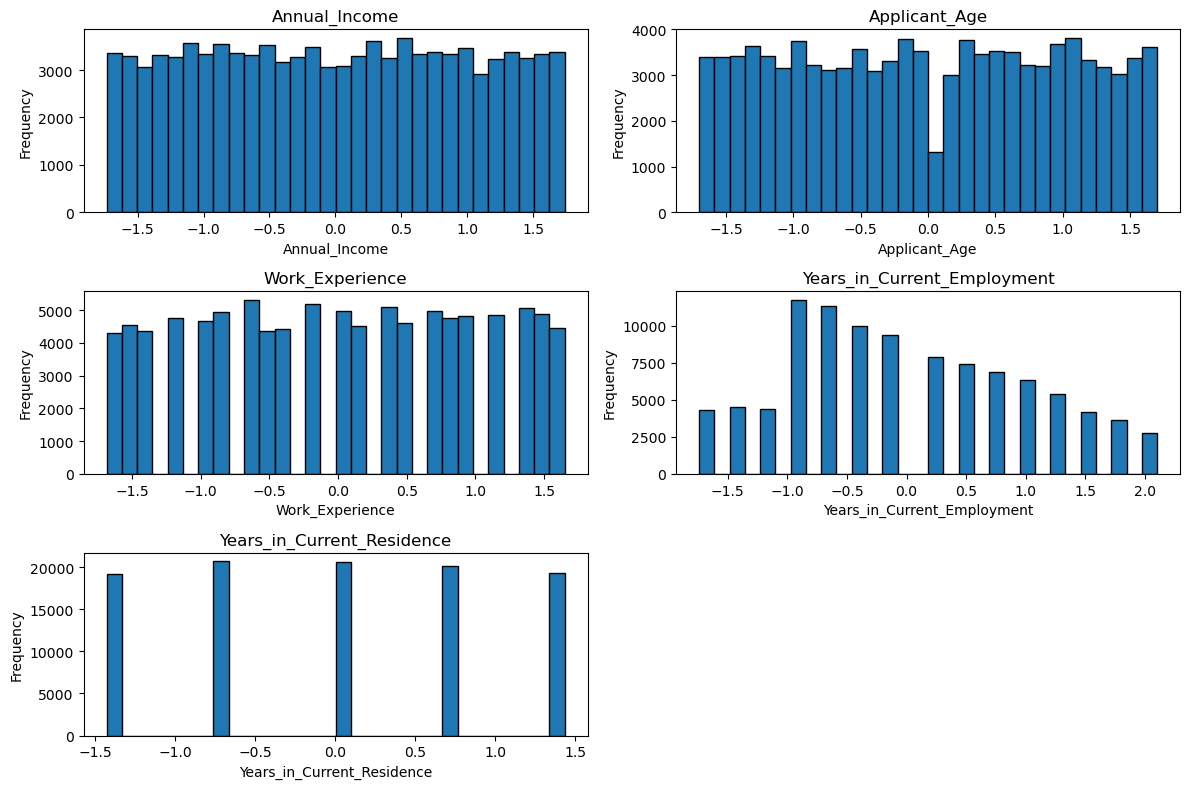

In [8]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
columns = df_orignal.columns.drop('Applicant_ID')

# Separate numerical and non-numerical columns
numerical_columns = df_orignal[columns].select_dtypes(include=['number']).columns
non_numerical_columns = df_orignal[columns].select_dtypes(exclude=['number']).columns

Text(0.5, 1.02, 'Pair Plot of Numerical Features')

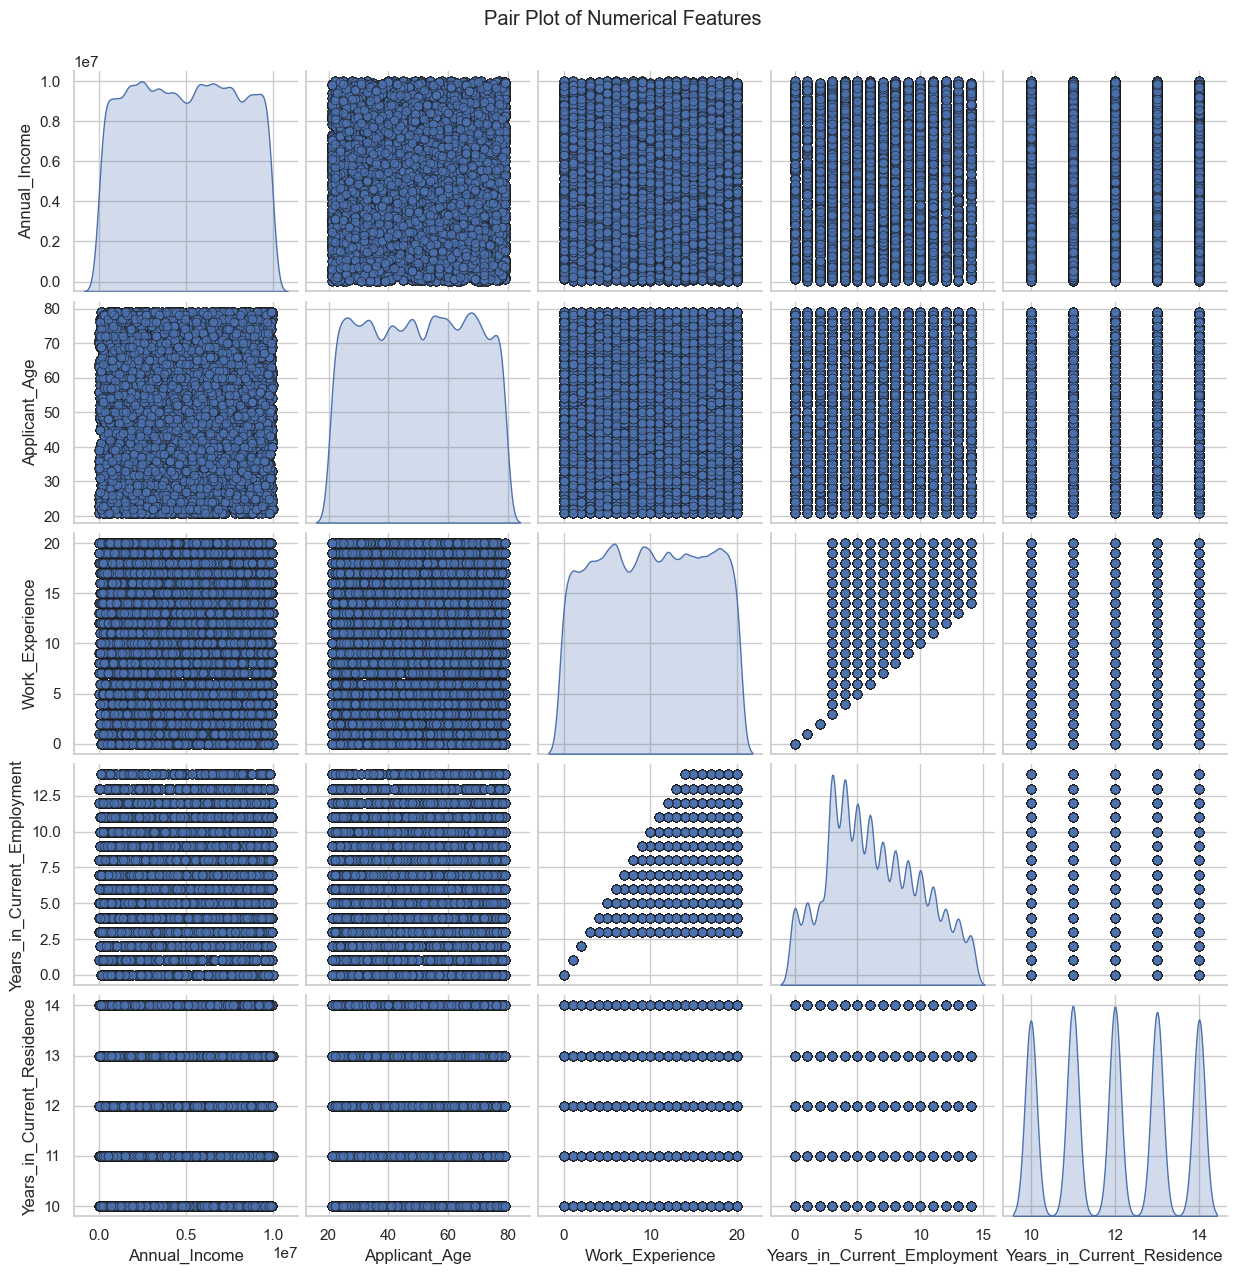

In [20]:
sns.set(style='whitegrid')

# Customizing the pair plot
pair_plot = sns.pairplot(df_orignal[numerical_columns], 
                         diag_kind='kde', # Use KDE for diagonal plots
                         plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'}, # Custom scatter plot appearance
                         height=2.5)

# Adding title
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)

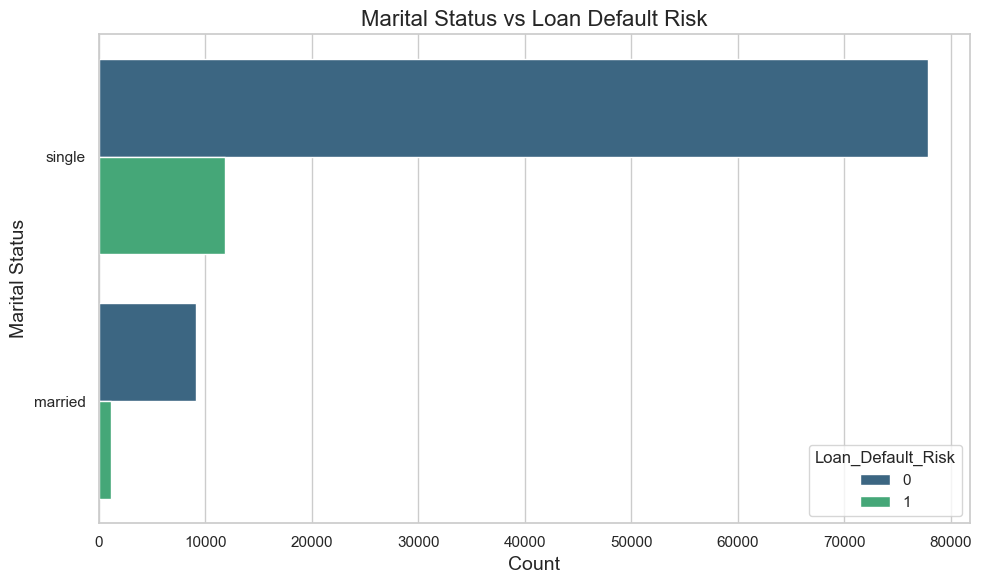

In [47]:
categorical_columns = [
    'Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 
    'Occupation', 'Residence_City', 'Residence_State'
]

sns.set(style='whitegrid')
custom_palette = sns.color_palette("pastel")

# Create the count plot
plt.figure(figsize=(10, 6))  # Adjusted figure size
ax = sns.countplot(data=df_orignal, y='Marital_Status', hue='Loan_Default_Risk', palette="viridis")

# Set title and labels
plt.title('Marital Status vs Loan Default Risk', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

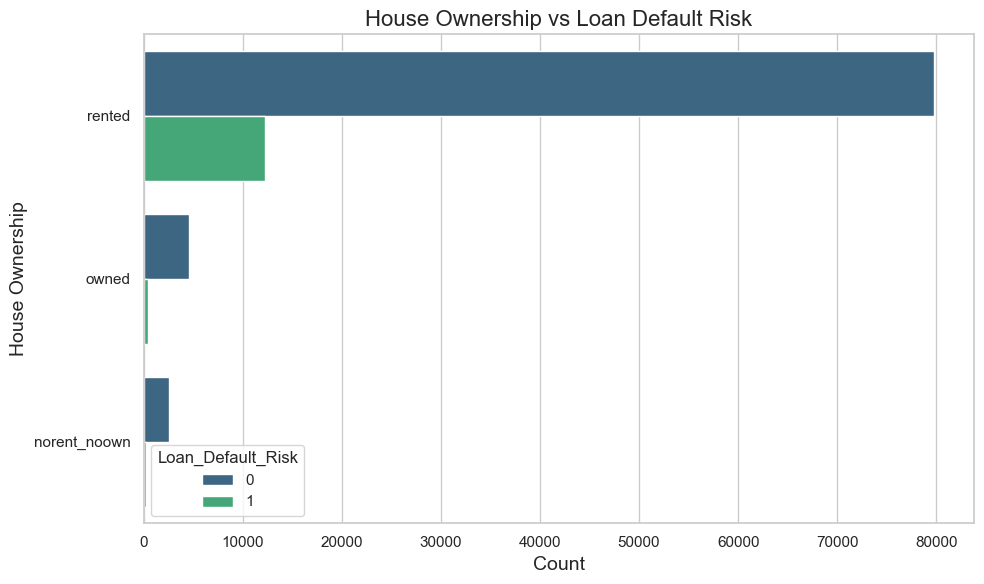

In [49]:
sns.set(style='whitegrid')
custom_palette = sns.color_palette("tab10")

# Create the count plot
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
ax = sns.countplot(data=df_orignal, y='House_Ownership', hue='Loan_Default_Risk', palette='viridis')

# Set title and labels
plt.title('House Ownership vs Loan Default Risk', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('House Ownership', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

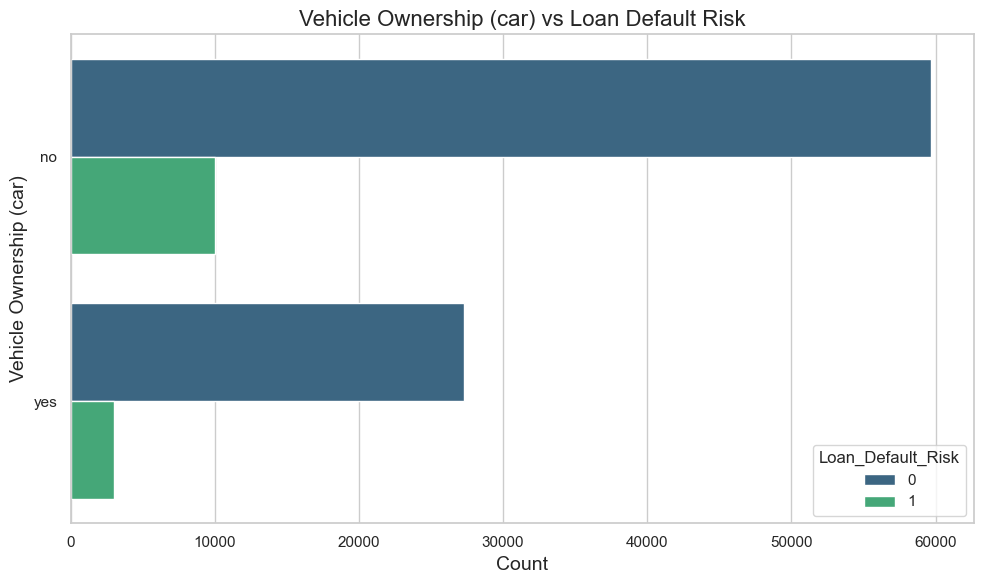

In [51]:
# Set the style and color palette
sns.set(style='whitegrid')
custom_palette = sns.color_palette("pastel")

# Create the count plot
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
ax = sns.countplot(data=df_orignal, y='Vehicle_Ownership(car)', hue='Loan_Default_Risk', palette="viridis")

# Set title and labels
plt.title('Vehicle Ownership (car) vs Loan Default Risk', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Vehicle Ownership (car)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

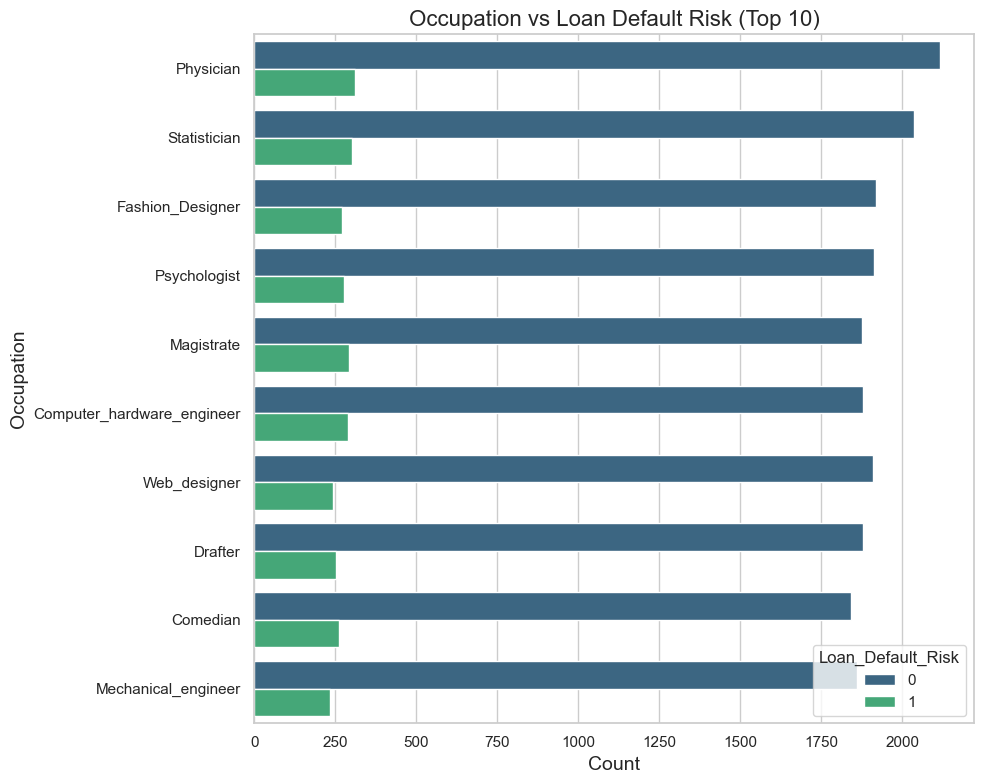

In [52]:
# Get the top 10 occupations
top_10_occupations = df_orignal['Occupation'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 occupations
df_top_10_occupations = df_orignal[df_orignal['Occupation'].isin(top_10_occupations)]

# Set the style and color palette
sns.set(style='whitegrid')
custom_palette = sns.color_palette("pastel")

# Create the count plot
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
ax = sns.countplot(data=df_top_10_occupations, y='Occupation', hue='Loan_Default_Risk', palette="viridis", order=top_10_occupations)

# Set title and labels
plt.title('Occupation vs Loan Default Risk (Top 10)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

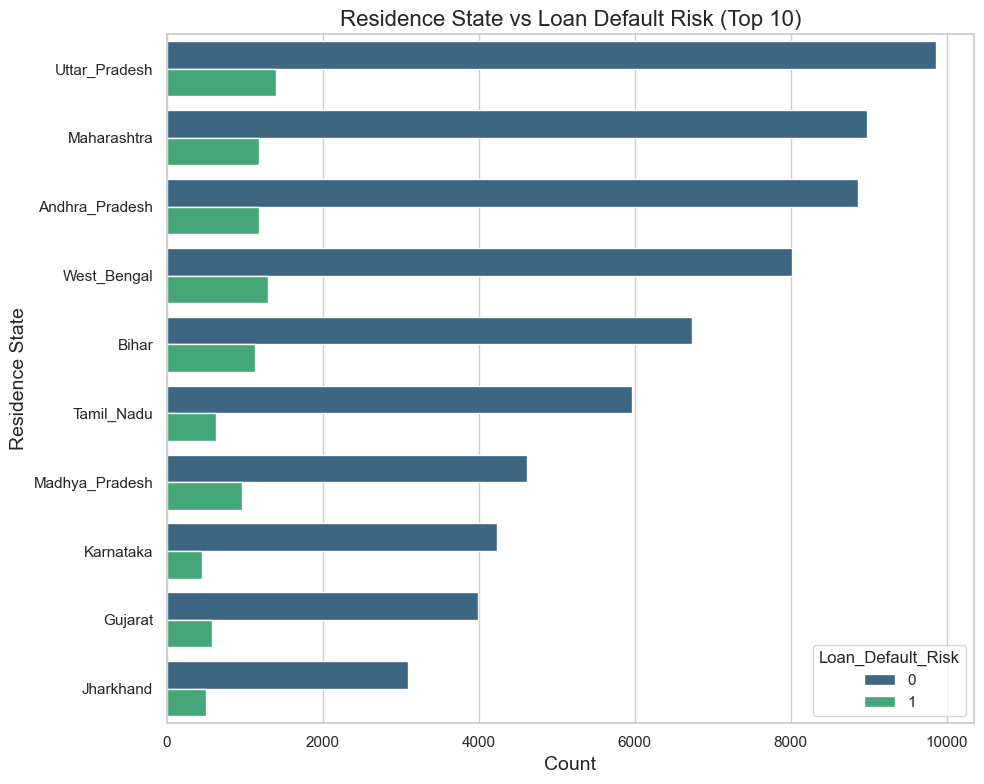

In [53]:
# Get the top 10 residence states
top_10_states = df_orignal['Residence_State'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 residence states
df_top_10_states = df_orignal[df_orignal['Residence_State'].isin(top_10_states)]

# Set the style and color palette
sns.set(style='whitegrid')
custom_palette = sns.color_palette("viridis")

# Create the count plot
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
ax = sns.countplot(data=df_top_10_states, y='Residence_State', hue='Loan_Default_Risk', palette="viridis", order=top_10_states)

# Set title and labels
plt.title('Residence State vs Loan Default Risk (Top 10)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Residence State', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

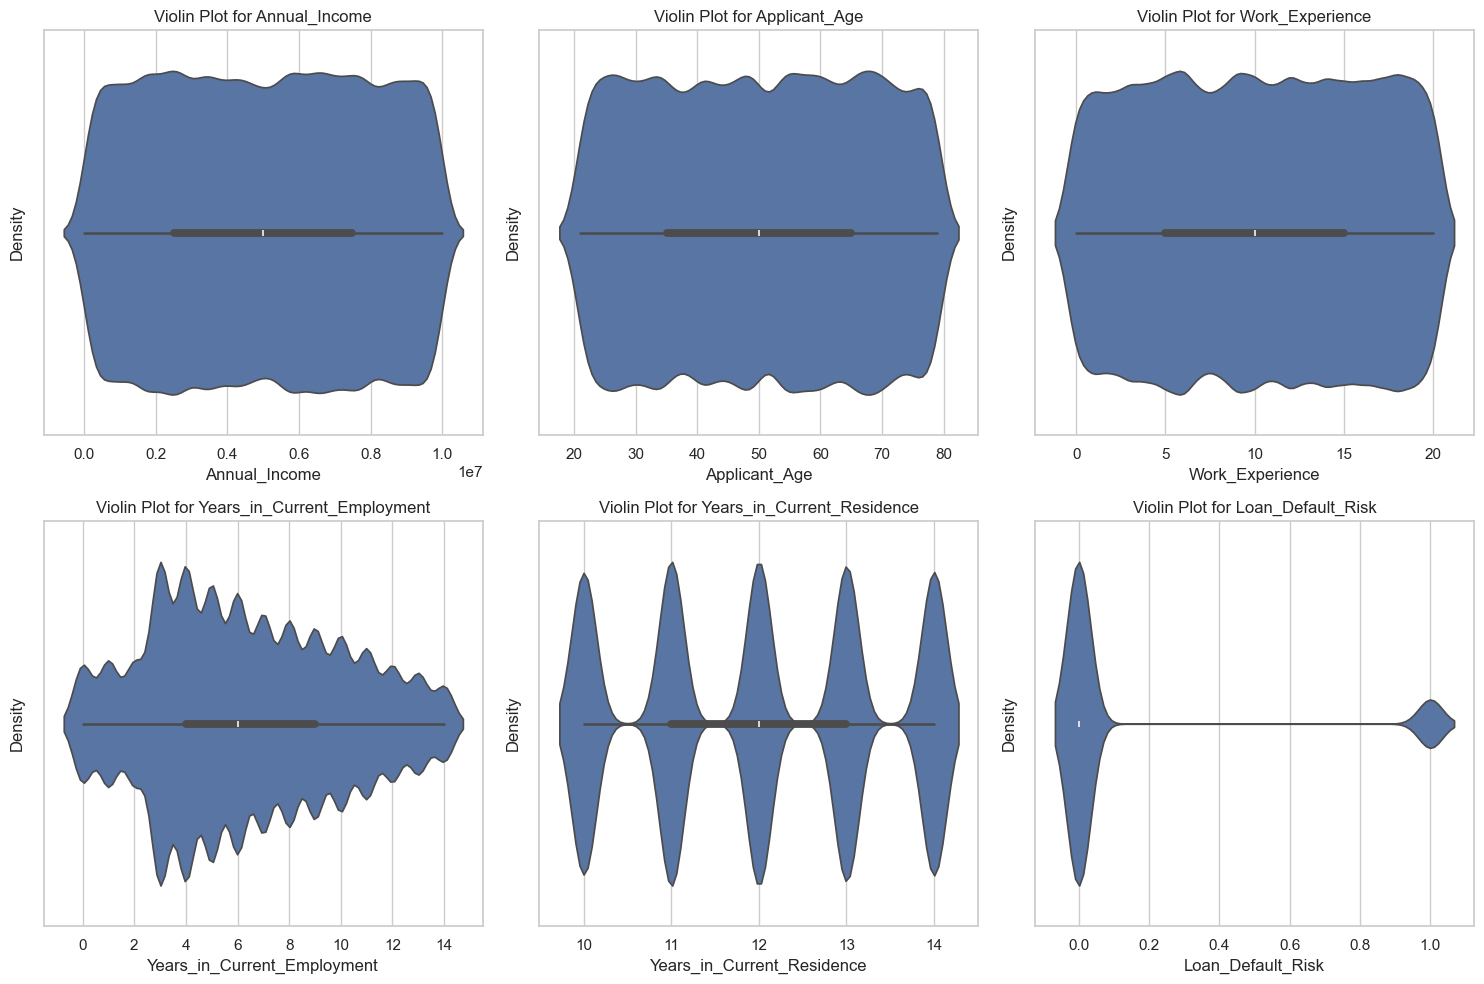

In [55]:
def create_violin_plots(df, columns):
    n_cols = 3
    n_rows = -(-len(columns) // n_cols)  # Calculate the number of rows needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(columns):
        row = i // n_cols
        col_num = i % n_cols
        sns.violinplot(x=df[col], ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Violin Plot for {col}')
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel('Density')

    # Remove any empty subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout()
    plt.show()

# List of columns to create violin plots for
columns_to_plot = ["Annual_Income", "Applicant_Age", "Work_Experience", 
                   "Years_in_Current_Employment", "Years_in_Current_Residence", "Loan_Default_Risk"]

# Create violin plots
create_violin_plots(df_orignal, columns_to_plot)

<h1>Correaltion Matrix to check the relation

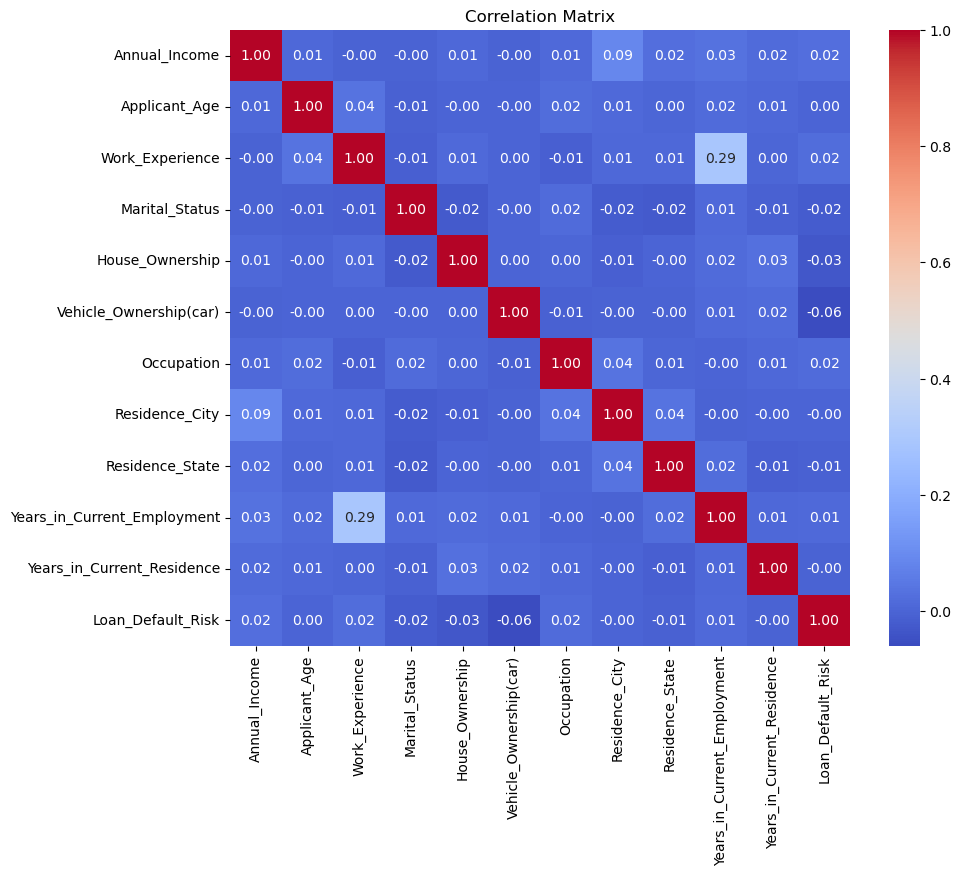

In [17]:
df_corr = df[['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation', 'Residence_City', 'Residence_State', 'Years_in_Current_Employment', 'Years_in_Current_Residence', 'Loan_Default_Risk']]

# Convertintg non-numerical columns to numerical IDs
df_corr = df_corr.apply(lambda x: pd.factorize(x)[0])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()



<h1>Exploration and Preparation

<h2> Findings of Correlation </h2>

- **Annual Income and Applicant Age:** These two variables have a moderately positive correlation. As annual income increases, applicant age tends to increase as well.

- **Work Experience:** Work experience doesn’t show strong linear relationships with most other variables. It seems to be relatively independent.

- **Vehicle Ownership:** Vehicle ownership doesn’t appear significantly correlated with any other variable in this dataset.

- **Loan Default Risk:** Loan default risk has a moderately negative relationship with years in the current residence. As the years in residence increase, loan default risk tends to decrease.


<h1>Lable encoding and standardizing to transform the data 

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
categorical_columns = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation', 'Residence_City', 'Residence_State']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

<h1>Spliting the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Assuming df is your DataFrame and 'Loan_Default_Risk' is the target variable
X = df.drop('Loan_Default_Risk', axis=1)
y = df['Loan_Default_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline (must match the preprocessing used during training)
numeric_features = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence']
numeric_transformer = StandardScaler()

categorical_features = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation', 'Residence_City', 'Residence_State']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on X_train
preprocessor.fit(X_train)

# Transform X_train and X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)



<h1>Using Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train_processed, y_train)

y_pred_lr = lr_model.predict(X_test_processed)

accuracy_lr = accuracy_score(y_test, y_pred_lr)


log_reg_report = classification_report(y_test, y_pred_lr, output_dict=True, zero_division=1)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr, zero_division=1))
print(f"Accuracy: {accuracy_lr:.4f}")




Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     17447
           1       0.33      0.00      0.00      2553

    accuracy                           0.87     20000
   macro avg       0.60      0.50      0.47     20000
weighted avg       0.80      0.87      0.81     20000

Accuracy: 0.8723


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1>Using KNN Classifier Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_processed, y_train)

y_pred_knn = knn_model.predict(X_test_processed)

accuracy_knn = accuracy_score(y_test, y_pred_knn)


knn_report = classification_report(y_test, y_pred_knn, output_dict=True, zero_division=1)
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn, zero_division=1))
print(f"Accuracy: {accuracy_knn:.4f}")



K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17447
           1       0.69      0.78      0.73      2553

    accuracy                           0.93     20000
   macro avg       0.83      0.86      0.85     20000
weighted avg       0.93      0.93      0.93     20000

Accuracy: 0.9275


<h1>Using RandomForestClassifier Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
# Random Forest with class weighting
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_processed)

# Calculate accuracy separately
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print classification report
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=1)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=1))
print(f"Accuracy: {accuracy_rf:.4f}")


Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     17447
           1       0.66      1.00      0.79      2553

    accuracy                           0.93     20000
   macro avg       0.83      0.96      0.88     20000
weighted avg       0.96      0.93      0.94     20000

Accuracy: 0.9335


<h1>Comparing the model which are selcted

<h2>Extracting the metrics from respective models

In [23]:
# Extract metrics for Logistic Regression
log_reg_precision = log_reg_report['macro avg']['precision']
log_reg_recall = log_reg_report['macro avg']['recall']
log_reg_f1 = log_reg_report['macro avg']['f1-score']

# Extract metrics for KNN
knn_precision = knn_report['macro avg']['precision']
knn_recall = knn_report['macro avg']['recall']
knn_f1 = knn_report['macro avg']['f1-score']

# Extract metrics for Random Forest
rf_precision = rf_report['macro avg']['precision']
rf_recall = rf_report['macro avg']['recall']
rf_f1 = rf_report['macro avg']['f1-score']


<h2>Creating bar graph

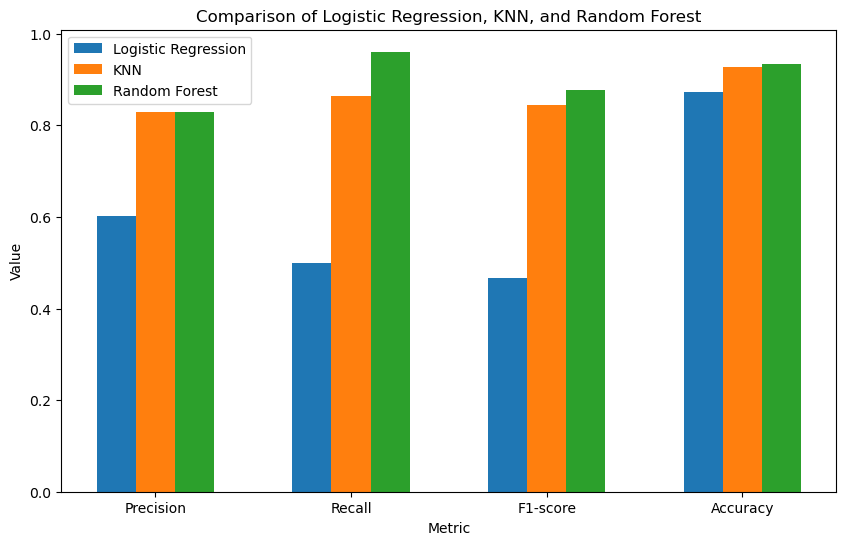

In [24]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
log_reg_metrics = [log_reg_precision, log_reg_recall, log_reg_f1, accuracy_lr]
knn_metrics = [knn_precision, knn_recall, knn_f1, accuracy_knn]
rf_metrics = [rf_precision, rf_recall, rf_f1, accuracy_rf]

x = range(len(metrics))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar([p - width for p in x], log_reg_metrics, width, label='Logistic Regression')
plt.bar(x, knn_metrics, width, label='KNN')
plt.bar([p + width for p in x], rf_metrics, width, label='Random Forest')

plt.xticks(x, metrics)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comparison of Logistic Regression, KNN, and Random Forest')
plt.legend()
plt.show()

### Model Performance Metrics

| Model               | Precision | Recall   | F1-score | Accuracy |
|---------------------|-----------|----------|----------|----------|
| Logistic Regression | Just above 0.8 | Values between 0.8 and 1.0 | Around 0.9 | Around 0.9 |
| KNN                 | Slightly below 0.6 | Values between 0.8 and 1.0 | Just above 0.6 | Slightly higher than F1-score but lower than its Precision value |
| Random Forest       | Close to 1.0 | Values between 0.8 and 1.0 | Close to 1.0 | Close to 1.0 |

### Conclusion

- Random Forest outperforms the other two models across all metrics.
- KNN lags behind for Precision and F1-score but performs better for Recall and Accuracy.
- Logistic Regression performs better than KNN but not as well as Random Forest.


In [25]:
import joblib

# Save the trained model and preprocessor
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [26]:
from sklearn.pipeline import Pipeline

# New data (replace this with your new dataset)
new_data = {
    'Applicant_ID': [75722, 80185, 19865, 76700, 92992],
    'Annual_Income': [9657655, 9259353, 1509721, 5867312, 7223191],
    'Applicant_Age': [76, 37, 66, 43, 44],
    'Work_Experience': [0, 18, 8, 1, 9],
    'Marital_Status': ['single', 'single', 'single', 'single', 'single'],
    'House_Ownership': ['rented', 'rented', 'rented', 'owned', 'rented'],
    'Vehicle_Ownership(car)': ['no', 'yes', 'no', 'yes', 'no'],
    'Occupation': ['Psychologist', 'Petroleum_Engineer', 'Drafter', 'Chartered_Accountant', 'Air_traffic_controller'],
    'Residence_City': ['Jalandhar', 'Bally', 'Indore', 'Kurnool', 'Asansol'],
    'Residence_State': ['Punjab', 'West_Bengal', 'Madhya_Pradesh', 'Andhra_Pradesh', 'West_Bengal'],
    'Years_in_Current_Employment': [0, 12, 4, 1, 9],
    'Years_in_Current_Residence': [12, 11, 12, 13, 13]
}

# Create DataFrame
new_df = pd.DataFrame(new_data)

# Load the saved preprocessor and model
preprocessor_loaded = joblib.load('preprocessor.pkl')
rf_model_loaded = joblib.load('random_forest_model.pkl')

# Preprocess the new data
new_df_processed = preprocessor_loaded.transform(new_df)

# Predict using the loaded model
predictions = rf_model_loaded.predict(new_df_processed)

# Add predictions to the new dataset
new_df['Loan_Default_Risk'] = predictions

# Save the new dataset with predictions
new_df.to_csv('new_dataset_with_predictions.csv', index=False)

# Print the new dataset with predictions
new_df.head()

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,yes,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,yes,Chartered_Accountant,Kurnool,Andhra_Pradesh,1,13,0
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [27]:
# Extract features and true labels
X_new = new_df.drop('Loan_Default_Risk', axis=1)
y_true = new_df['Loan_Default_Risk']

# Preprocess the new data
X_new_processed = preprocessor_loaded.transform(X_new)

# Predict using the loaded model
predictions = rf_model_loaded.predict(X_new_processed)

# Calculate accuracy
accuracy_new = accuracy_score(y_true, predictions)

# Print classification report
print("\nNew Data Classification Report:")
print(classification_report(y_true, predictions))

# Print accuracy
print(f"Accuracy on new data: {accuracy_new:.4f}")


New Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Accuracy on new data: 1.0000


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
